<a href="https://www.kaggle.com/code/jayant445/pca-demo-1?scriptVersionId=251732215" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
df.shape

(42000, 785)

In [4]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
6386,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
import matplotlib.pyplot as plt

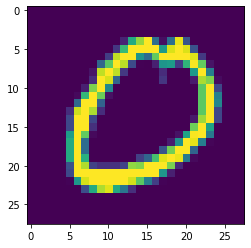

In [6]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [7]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train.shape

(33600, 784)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier()

In [12]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [13]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

12.571895599365234


In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [18]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [19]:
X_train_trf.shape

(33600, 200)

In [20]:
knn = KNeighborsClassifier()

In [21]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [22]:
y_pred = knn.predict(X_test_trf)

In [23]:
accuracy_score(y_test,y_pred)

0.950952380952381

In [24]:
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(X_train_trf,y_train)
    
    y_pred = knn.predict(X_test_trf)
    
    print(accuracy_score(y_test,y_pred))

0.2580952380952381
0.3242857142857143
0.5104761904761905
0.6664285714285715
0.7379761904761905
0.8232142857142857
0.8430952380952381
0.8723809523809524
0.8873809523809524
0.9054761904761904
0.9117857142857143
0.9183333333333333
0.9269047619047619
0.9354761904761905
0.9379761904761905
0.9377380952380953
0.9397619047619048
0.9411904761904762
0.9428571428571428
0.9442857142857143
0.9430952380952381
0.9447619047619048
0.9444047619047619
0.9442857142857143
0.9480952380952381
0.9466666666666667
0.9480952380952381
0.9485714285714286
0.95
0.9495238095238095
0.9511904761904761
0.9520238095238095
0.9517857142857142
0.9507142857142857
0.950952380952381
0.9510714285714286
0.9520238095238095
0.9528571428571428
0.9535714285714286
0.9522619047619048
0.9538095238095238
0.9526190476190476
0.9533333333333334
0.954047619047619
0.9532142857142857
0.9533333333333334
0.9532142857142857
0.9539285714285715
0.9528571428571428
0.9539285714285715
0.9541666666666667
0.9536904761904762
0.9544047619047619
0.9539285

In [25]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [26]:
X_train_trf

array([[-2.71867347, -0.49005205],
       [-0.67698649, -6.75357108],
       [-3.03315915,  6.51020116],
       ...,
       [ 2.14884183,  0.78076896],
       [ 1.05953496,  0.94742383],
       [17.70257007,  1.96182791]])

In [27]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [28]:
# transforming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [29]:
X_train_trf

array([[-2.71863432, -0.48986933,  1.13522737],
       [-0.67697523, -6.75344297, -2.33619798],
       [-3.03321549,  6.50920882,  7.49277561],
       ...,
       [ 2.14881432,  0.781226  , -0.74773414],
       [ 1.05956327,  0.94780194,  3.94932203],
       [17.70259488,  1.96178945, -4.94358444]])

In [30]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [31]:
pca.explained_variance_
# Eigen values

array([40.67111198, 29.17023388, 26.74459605])

In [32]:
pca.components_.shape
# Eigen vectors

(3, 784)

In [33]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [34]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [35]:
pca.explained_variance_.shape

(784,)

In [36]:
pca.components_.shape

(784, 784)

In [37]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

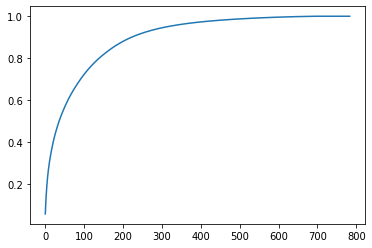

In [38]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))